Задача бинарной классификации изображений для компьютерного зрения робота.
На вход подается изображение с камеры робота, а на выходе вероятность нахождения людей и/или животных на кадре. 
В зависимости от вероятности будет приниматься решение дальнейшего движения робота. 

Этапы решения задачи:

1. Сформировать датасет
2. Построить модель

Решение поставленной задачи первым способом: сверточная нейронная сеть.
В качестве  датасета использованы фотографии из личного архива. В обучающей выборке 4000 фотографий разделенных на два класса.
В проверочной  выборке 612 фотографий разделенных на два класса.
В тестовой выборке 60 фотографий. 
Обучение модели производилось в среде Google Colab, так как нет достаточной вычислительной мощности на домашнем компьютере. 
На тестовом наборе модель показала точность 0.847.
Так же использованы 24 фотографии для демонстрации работы модели.

In [1]:
#Модель №1: сверточная нейронная сеть
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image 
%matplotlib inline

In [2]:
#Настройки параметров

#путь к датасету
dataset_path = r'G:\ADATA\Data Science\Итоговый проект\Проект 1\Dataset\Robot_vision\dataset'
base_dir = pathlib.Path(dataset_path)

img_size = (200, 200)

BATCH = 16

EPOCH = 30

#Генераторы

train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size = img_size,
    shuffle = True,
    batch_size = BATCH )

validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size = img_size,
    batch_size = BATCH )

test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size = img_size,
    batch_size = BATCH )

Found 4000 files belonging to 2 classes.
Found 611 files belonging to 2 classes.
Found 59 files belonging to 2 classes.


In [3]:
#Модель
inputs = keras.Input(shape = (200, 200, 3))
x = tensorflow.keras.layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_robot_v1 = keras.Model(inputs=inputs, outputs=outputs)

model_robot_v1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [4]:
model_robot_v1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                         

In [ ]:
#Модель обучена в google colab
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model_robot_v1.fit(
    train_dataset,
    epochs = EPOCH,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize = (12, 8))
plt.plot(epochs, accuracy, "bo", label="Точность при обучении")
plt.plot(epochs, val_accuracy, "b", label="Точность при проверке")
plt.xlabel('Эпоха')
plt.title("Точность")
plt.legend()
plt.figure(figsize = (12, 8))
plt.plot(epochs, loss, "bo", label="Потеря при обучении")
plt.plot(epochs, val_loss, "b", label="Потеря при проверке")
plt.xlabel('Эпоха')
plt.title("Потеря")
plt.legend()
plt.show()

In [6]:
#сохранение модели
model_robot_v1.save(r'G:\ADATA\Data Science\Итоговый проект\Проект 1\Dataset\Robot_vision\models\v1')

INFO:tensorflow:Assets written to: G:\ADATA\Data Science\Итоговый проект\Проект 1\Dataset\Robot_vision\models\v1\assets


INFO:tensorflow:Assets written to: G:\ADATA\Data Science\Итоговый проект\Проект 1\Dataset\Robot_vision\models\v1\assets


In [10]:
#загрузка сохраненной модели
loaded_model = keras.models.load_model(r'G:\ADATA\Data Science\Итоговый проект\Проект 1\Dataset\Robot_vision\models\v1')

In [11]:
#Проверка точности загруженной модели
test_loss, test_acc = loaded_model.evaluate(test_dataset)
print(f"Точность на тестовом множестве: {test_acc:.3f}")

4/4 [==============================] - 1s 138ms/step - loss: 0.8086 - accuracy: 0.8475
Точность на тестовом множестве: 0.847


Демонстрация работы модели

Found 24 files belonging to 1 classes.
№ файла:  1
1/1 [==============================] - 0s 310ms/step
Вероятность нахождения людей и/или животных =  1.0


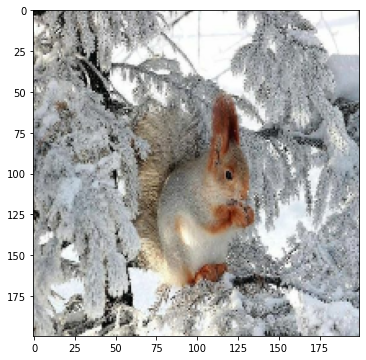

----------------------------------
№ файла:  2
1/1 [==============================] - 0s 53ms/step
Вероятность нахождения людей и/или животных =  0.3227


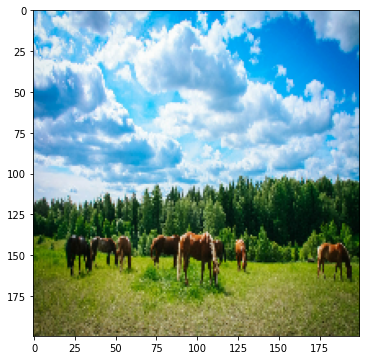

----------------------------------
№ файла:  3
1/1 [==============================] - 0s 32ms/step
Вероятность нахождения людей и/или животных =  0.9999


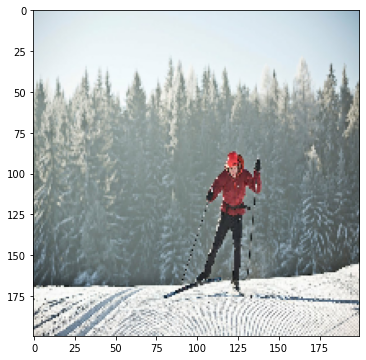

----------------------------------
№ файла:  4
1/1 [==============================] - 0s 32ms/step
Вероятность нахождения людей и/или животных =  0.9999


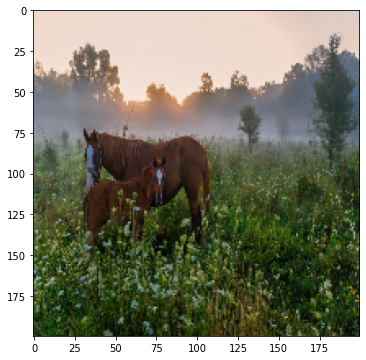

----------------------------------
№ файла:  5
1/1 [==============================] - 0s 31ms/step
Вероятность нахождения людей и/или животных =  0.6935


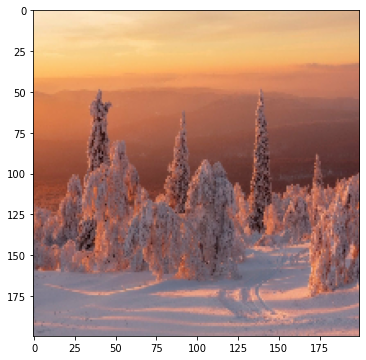

----------------------------------
№ файла:  6
1/1 [==============================] - 0s 30ms/step
Вероятность нахождения людей и/или животных =  0.1791


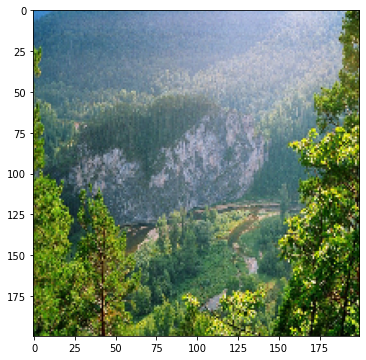

----------------------------------
№ файла:  7
1/1 [==============================] - 0s 21ms/step
Вероятность нахождения людей и/или животных =  0.0101


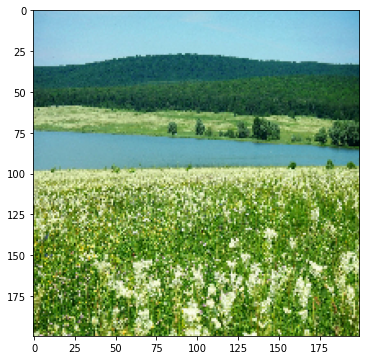

----------------------------------
№ файла:  8
1/1 [==============================] - 0s 33ms/step
Вероятность нахождения людей и/или животных =  0.9544


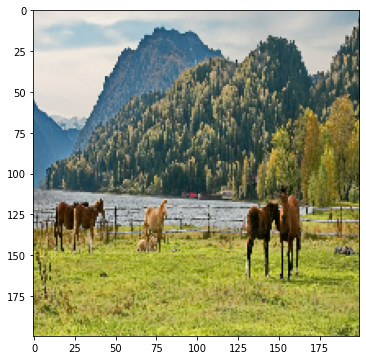

----------------------------------
№ файла:  9
1/1 [==============================] - 0s 32ms/step
Вероятность нахождения людей и/или животных =  0.9995


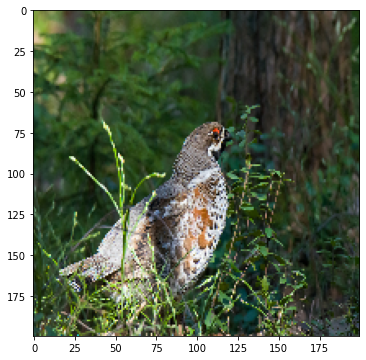

----------------------------------
№ файла:  10
1/1 [==============================] - 0s 32ms/step
Вероятность нахождения людей и/или животных =  0.9999


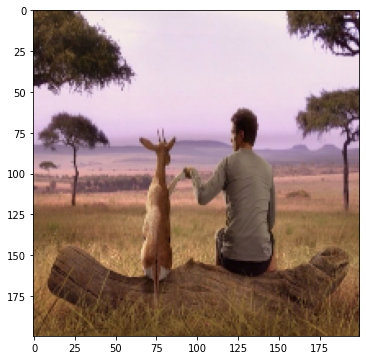

----------------------------------
№ файла:  11
1/1 [==============================] - 0s 30ms/step
Вероятность нахождения людей и/или животных =  1.0


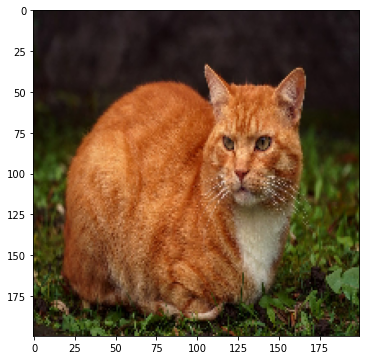

----------------------------------
№ файла:  12
1/1 [==============================] - 0s 30ms/step
Вероятность нахождения людей и/или животных =  1.0


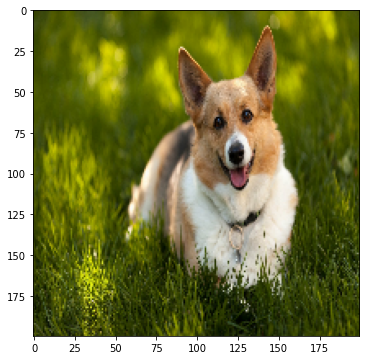

----------------------------------
№ файла:  13
1/1 [==============================] - 0s 29ms/step
Вероятность нахождения людей и/или животных =  1.0


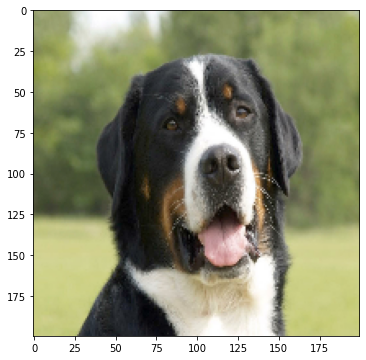

----------------------------------
№ файла:  14
1/1 [==============================] - 0s 22ms/step
Вероятность нахождения людей и/или животных =  1.0


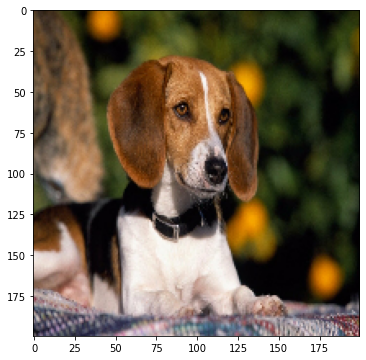

----------------------------------
№ файла:  15
1/1 [==============================] - 0s 28ms/step
Вероятность нахождения людей и/или животных =  0.4833


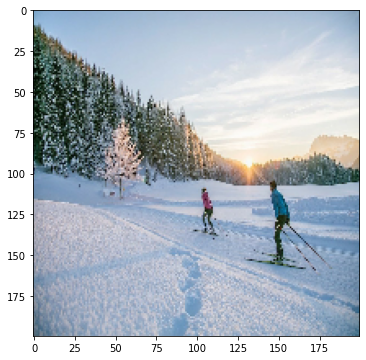

----------------------------------
№ файла:  16
1/1 [==============================] - 0s 28ms/step
Вероятность нахождения людей и/или животных =  1.0


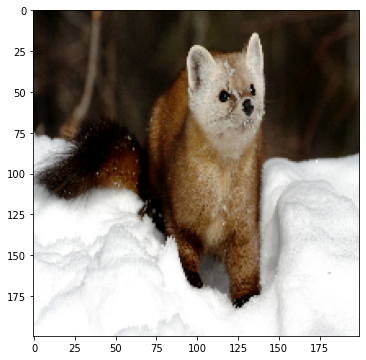

----------------------------------
№ файла:  17
1/1 [==============================] - 0s 29ms/step
Вероятность нахождения людей и/или животных =  0.0803


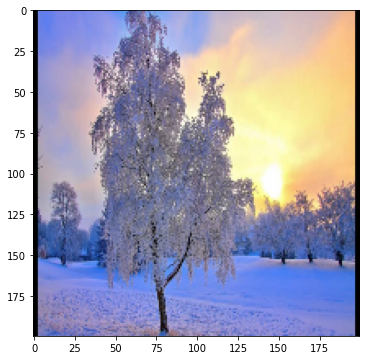

----------------------------------
№ файла:  18
1/1 [==============================] - 0s 28ms/step
Вероятность нахождения людей и/или животных =  1.0


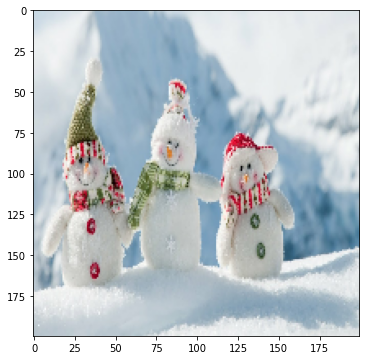

----------------------------------
№ файла:  19
1/1 [==============================] - 0s 26ms/step
Вероятность нахождения людей и/или животных =  0.7327


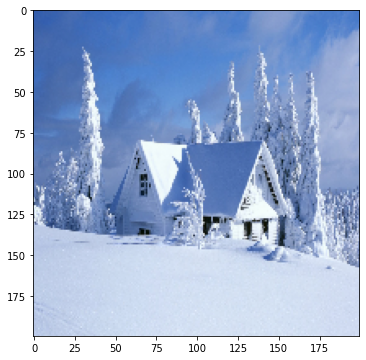

----------------------------------
№ файла:  20
1/1 [==============================] - 0s 24ms/step
Вероятность нахождения людей и/или животных =  0.9971


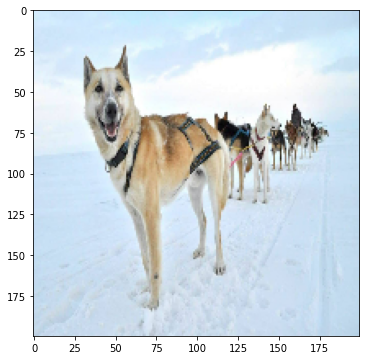

----------------------------------
№ файла:  21
1/1 [==============================] - 0s 26ms/step
Вероятность нахождения людей и/или животных =  1.0


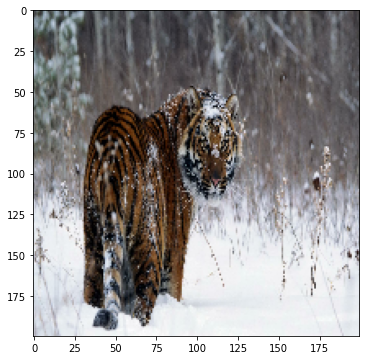

----------------------------------
№ файла:  22
1/1 [==============================] - 0s 29ms/step
Вероятность нахождения людей и/или животных =  0.9005


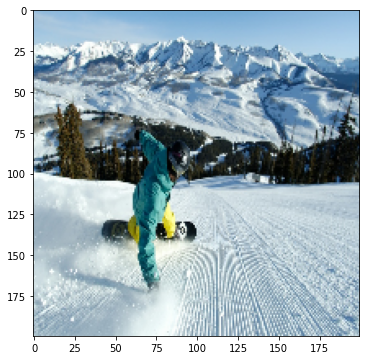

----------------------------------
№ файла:  23
1/1 [==============================] - 0s 22ms/step
Вероятность нахождения людей и/или животных =  0.9985


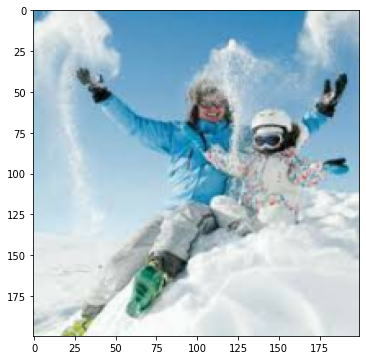

----------------------------------
№ файла:  24
1/1 [==============================] - 0s 32ms/step
Вероятность нахождения людей и/или животных =  0.1459


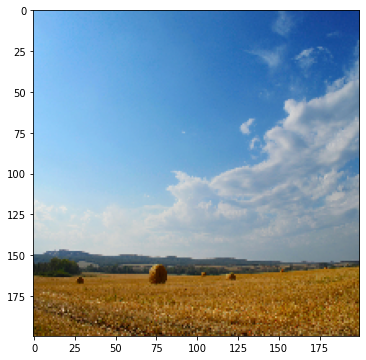

----------------------------------


In [12]:
#Генератор для предсказаний
base_dir = pathlib.Path(dataset_path)
predict_dataset = image_dataset_from_directory(
    base_dir / "predict",
    image_size = (200, 200),
    batch_size = 1,
    shuffle = False)

i = 1
for data_batch, labels_batch in predict_dataset:
    print('№ файла: ', i)
    print('Вероятность нахождения людей и/или животных = ', np.round(loaded_model.predict(data_batch)[0][0], 4))
    plt.figure(figsize = (8, 6))
    plt.imshow(image.image_utils.array_to_img(data_batch.numpy()[0]))
    plt.show()
    print('----------------------------------')
    i += 1